In [ ]:
#Importing the Libraries
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('4.csv')

In [ ]:
df = df.dropna()
print(df)

In [ ]:
df.isnull().sum()

In [ ]:
X=df.drop(['Category-10','Category'],axis=1)
y=df['Category-10']


In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [ ]:
# AutoEncoder Model Preparation
n_inputs = X.shape[1]
# define encoder
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [ ]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=16, verbose=2, validation_data=(X_test,y_test))

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

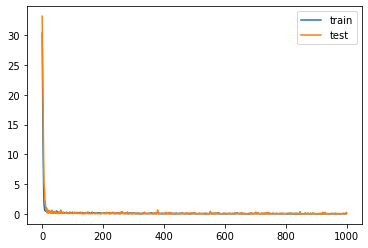

In [ ]:
# plot loss
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#Importing the Libraries
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8955223880597015

In [ ]:
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

In [ ]:
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['3','5','2','1','4','6','7','8','9'], 
                     columns = ['3','5','2','1','4','6','7','8','9'])

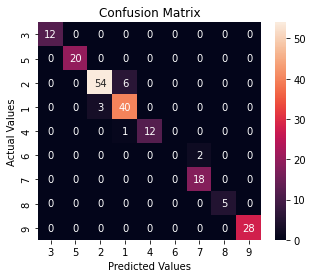

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
from google.colab import files
plt.savefig("abc.png")

In [ ]:
#Building a Base Model to compare the performance after compressing the data using Encoder model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

In [ ]:
#Compressing the input data using Encoder Model and fitting it on the Logistic Regression model.
# load the model from file
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = SVC(max_iter=1000)
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9751243781094527


In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
model.predict(X_test_encode)

array([ 8,  6,  5,  5,  8,  5,  5,  4,  5, 10,  5,  3, 10,  6,  1,  1, 10,
        6,  5,  8,  4,  1, 10, 10,  6,  4,  3,  3,  4,  4,  4,  3,  4,  5,
        4,  4,  3,  6,  8,  4,  5,  4,  5,  8,  5,  3,  4,  8,  8,  5,  5,
        3,  8,  4, 10,  4,  1,  3,  4,  5,  4,  5,  4,  8,  4,  8,  4,  3,
        6,  5,  4,  4,  5,  4,  4,  4,  4,  3, 10,  1,  4,  5,  5,  1,  3,
       10,  8,  4,  5,  4,  9,  3,  5,  4, 10,  5,  4,  5,  6, 10,  6,  5,
        5,  4, 10,  5,  4,  5,  1,  4,  4,  4,  8,  1, 10,  3,  4,  4,  4,
        5,  6,  7,  5, 10,  5,  3,  4, 10,  4, 10,  8,  1,  3, 10,  4, 10,
        5,  4,  4,  3,  4,  1,  8, 10,  4,  4, 10,  4,  4,  8,  5,  9, 10,
        6,  3,  1, 10,  5,  4,  5,  4,  5,  4,  5,  6,  5,  5,  1,  3, 10,
        5,  8,  5,  8,  4,  4, 10, 10,  4,  5, 10,  5,  4,  5,  9,  9,  4,
        4,  3,  6,  5,  8, 10, 10,  6,  4,  9,  4,  3,  9,  8])

In [ ]:
#Testing the model using X_test and storing the output in y_pred
y_pred = model.predict(X_test_encode)

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['3','5','2','1','4','6','7','8','9'], 
                     columns = ['3','5','2','1','4','6','7','8','9'])

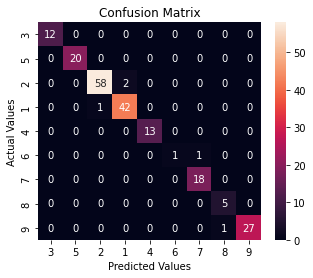

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#ROC